I am looking at simulating the world happiness data for either 2016 or 2017

There are various sources of data on this.
- The [World Happiness Report 2017](https://worldhappiness.report/ed/2017/)

- The [Happy Planet Index](http://happyplanetindex.org/about)
>The Happy Planet Index measures what matters: sustainable wellbeing for all. It tells us how well nations are doing at achieving long, happy, sustainable lives.
<http://happyplanetindex.org/s/hpi-data-2016.xlsx>

Kaggle also hosts the world happiness data in csv at  <https://www.kaggle.com/unsdsn/world-happiness>

I will first look through the variables in each of the reports, look at distribution plots and summary statistics.



In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [2]:
# see what files I have downloaded
!ls

2015.csv
LICENSE
Programming_for_Data_Analysis_Project2019.pdf
README.md
Simulation.ipynb
data
etc
images
reports
worldhappiness.ipynb


In [3]:
!ls data


Chapter2OnlineData.xls                  hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness
WHR2018Chapter2OnlineData.xls


In [4]:
!ls data/world-happiness

2015.csv 2016.csv 2017.csv 2018.csv 2019.csv


# The World Happinss data for 2016 from Kaggle:

In [72]:
import pandas as pd  # import pandas library

#csv_url = "https://www.kaggle.com/unsdsn/world-happiness#2016.csv"

## creata a DataFrame named df from reading in the csv file from a URL
df =  pd.read_csv('data/world-happiness/2019.csv')  ## creata a DataFrame named df from reading in the csv file from a URL

In [73]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
print("The index of the tips DataFrame: ", df.index)
print("The dtypes in the dataframe are:", end='\n\n')

print(df.dtypes) # 

The index of the tips DataFrame:  RangeIndex(start=0, stop=157, step=1)
The dtypes in the dataframe are:

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
                                  ...   
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Length: 13, dtype: object


In [8]:
# checking if there are any missing values, using * to save printing space
print(*df.isna().any()) # isna returns boolean values 0 or 1, sum them to get count of NA's


False False False False False False False False False False False False False


In [9]:
print(*df.isna().sum())

0 0 0 0 0 0 0 0 0 0 0 0 0


In [10]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [11]:
df.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [12]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
                                  ...   
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Length: 13, dtype: object

In [13]:
# select a subset of columns
df.iloc[:, 2:13].head()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### Look at the distributions of each variable

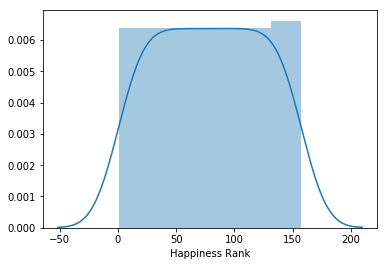

In [14]:
sns.distplot(df['Happiness Rank']);

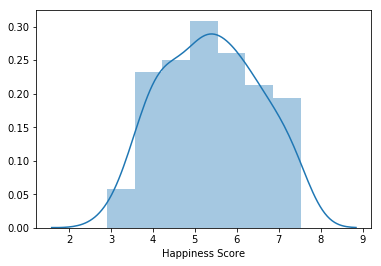

In [15]:
sns.distplot(df['Happiness Score']);

Next I want to plot the distributions of each column.
Instead of doing each one individually I will try using a loop.

Happiness Rank
0        1
1        2
2        3
3        4
      ... 
153    154
154    155
155    156
156    157
Name: Happiness Rank, Length: 157, dtype: int64


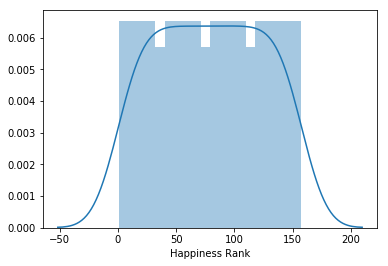

Happiness Score
0      7.526
1      7.509
2      7.501
3      7.498
       ...  
153    3.360
154    3.303
155    3.069
156    2.905
Name: Happiness Score, Length: 157, dtype: float64


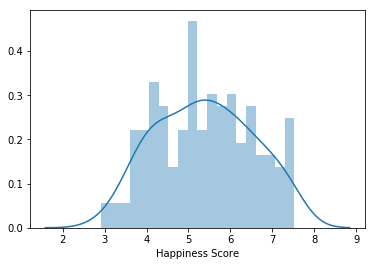

Lower Confidence Interval
0      7.460
1      7.428
2      7.333
3      7.421
       ...  
153    3.288
154    3.192
155    2.936
156    2.732
Name: Lower Confidence Interval, Length: 157, dtype: float64


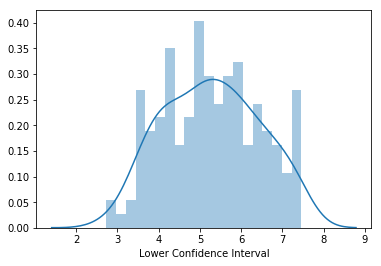

Upper Confidence Interval
0      7.592
1      7.590
2      7.669
3      7.575
       ...  
153    3.432
154    3.414
155    3.202
156    3.078
Name: Upper Confidence Interval, Length: 157, dtype: float64


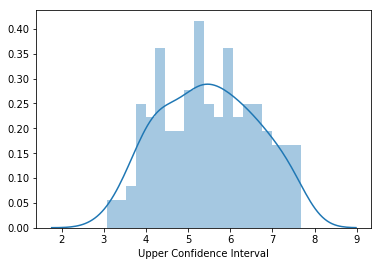

Economy (GDP per Capita)
0      1.44178
1      1.52733
2      1.42666
3      1.57744
        ...   
153    0.38227
154    0.28123
155    0.74719
156    0.06831
Name: Economy (GDP per Capita), Length: 157, dtype: float64


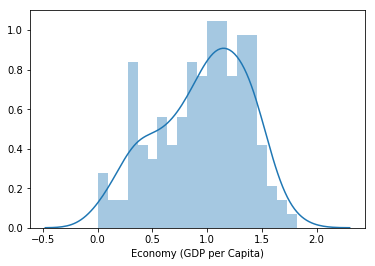

Family
0      1.16374
1      1.14524
2      1.18326
3      1.12690
        ...   
153    0.11037
154    0.00000
155    0.14866
156    0.23442
Name: Family, Length: 157, dtype: float64


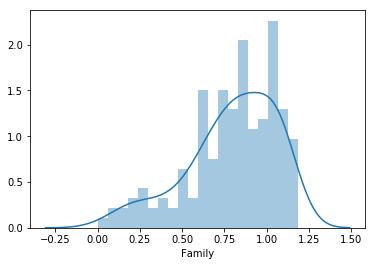

Health (Life Expectancy)
0      0.79504
1      0.86303
2      0.86733
3      0.79579
        ...   
153    0.17344
154    0.24811
155    0.62994
156    0.15747
Name: Health (Life Expectancy), Length: 157, dtype: float64


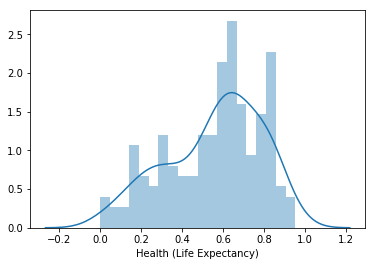

Freedom
0      0.57941
1      0.58557
2      0.56624
3      0.59609
        ...   
153    0.16430
154    0.34678
155    0.06912
156    0.04320
Name: Freedom, Length: 157, dtype: float64


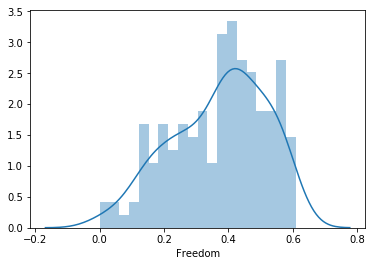

Trust (Government Corruption)
0      0.44453
1      0.41203
2      0.14975
3      0.35776
        ...   
153    0.07112
154    0.11587
155    0.17233
156    0.09419
Name: Trust (Government Corruption), Length: 157, dtype: float64


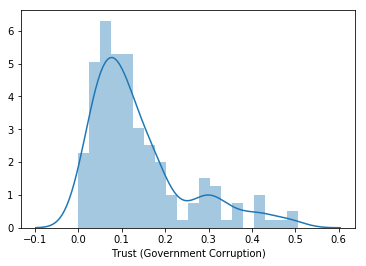

Generosity
0      0.36171
1      0.28083
2      0.47678
3      0.37895
        ...   
153    0.31268
154    0.17517
155    0.48397
156    0.20290
Name: Generosity, Length: 157, dtype: float64


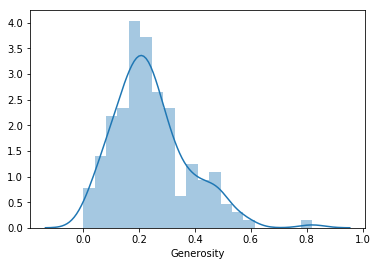

Dystopia Residual
0      2.73939
1      2.69463
2      2.83137
3      2.66465
        ...   
153    2.14558
154    2.13540
155    0.81789
156    2.10404
Name: Dystopia Residual, Length: 157, dtype: float64


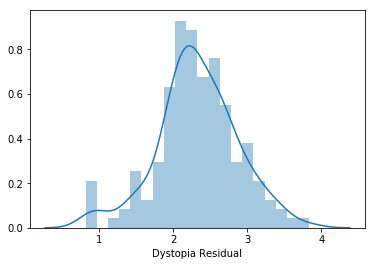

In [16]:
# exclude first 2 columns, select all rows
for i in df.iloc[:, 2:13]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(df[i])
    # plot a distogram
    sns.distplot(df[i], bins=20)
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
 

The last column is missing one value for the United Arab Emirates.
For now I will just plot this by dropping the value. I won't change the dataframe though and instead will just create a series and drop the value from this.

In [17]:
pd.isna(df).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
                                ..
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Length: 13, dtype: int64

# The World Happiness Report

[World Happiness Report 2018](https://worldhappiness.report/ed/2018/)
>The World Happiness Report is a landmark survey of the state of global happiness. The World Happiness Report 2018, ranks 156 countries by their happiness levels, and 117 countries by the happiness of their immigrants. The main focus of this year’s report, in addition to its usual ranking of the levels and changes in happiness around the world, is on migration within and between countries.

In [18]:
!ls data


Chapter2OnlineData.xls                  hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness
WHR2018Chapter2OnlineData.xls


In [19]:
whr = pd.read_excel('data/WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [20]:
whr.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [21]:
whr.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
                                                           ... 
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            979
GINI index (World Bank estimate), average 2000-15           176
gini of household income reported in Gallup, by wp5-year    357
Length: 19, dtype: int64

In [22]:
whr.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [23]:
whr.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [24]:
whr.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
                                                             ...   
Standard deviation/Mean of ladder by country-year           float64
GINI index (World Bank estimate)                            float64
GINI index (World Bank estimate), average 2000-15           float64
gini of household income reported in Gallup, by wp5-year    float64
Length: 19, dtype: object

In [25]:
whr.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [27]:
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [28]:
print(whr.head())

       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0       

In [29]:
ireland =whr[whr['country'] == 'Ireland']
ireland.head()
ireland.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,11.000000,11.000000,8.000000,11.000000,9.000000
mean,2011.909091,7.063328,10.817896,0.963438,70.855011,0.896362,0.274474,0.493530,0.839342,0.212719,0.467460,1.173362,1.635812,1.803672,0.255881,0.323375,0.325545,0.474851
std,3.477198,0.214718,0.151005,0.011441,0.672133,0.034832,0.064472,0.095640,0.033997,0.027082,0.130851,0.075793,0.057770,0.127213,0.023148,0.007249,0.000000,0.096488
min,2006.000000,6.760085,10.680227,0.943482,69.458565,0.834730,0.161004,0.337085,0.784335,0.147759,0.285016,1.085433,1.564082,1.511517,0.199724,0.309000,0.325545,0.365785
25%,2009.500000,6.985775,10.717489,0.956666,70.532867,0.879181,0.226790,0.407397,0.811774,0.204645,0.339226,1.122935,1.586951,1.766497,0.252162,0.322000,0.325545,0.393113
50%,2012.000000,7.040731,10.737757,0.961786,70.865311,0.894109,0.291833,0.486995,0.835202,0.212784,0.513728,1.152048,1.621462,1.820700,0.259389,0.324000,0.325545,0.470195
75%,2014.500000,7.102201,10.913617,0.970315,71.373070,0.913485,0.317085,0.576116,0.870304,0.230711,0.573290,1.200106,1.686281,1.879283,0.265528,0.327000,0.325545,0.502659
max,2017.000000,7.568030,11.066487,0.982522,71.709785,0.952034,0.373031,0.618024,0.878256,0.245268,0.632927,1.304415,1.719995,1.983884,0.293470,0.334000,0.325545,0.654719


In [30]:
ireland.loc[ireland.loc[:,'year']==2016]

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
642,Ireland,2016,7.040731,11.050761,0.958144,71.575096,0.874589,0.161004,0.398544,0.809203,0.211063,0.57474,1.085433,1.564082,1.843073,0.261773,NaN,0.325545,0.365785


In [46]:
whr.loc[whr.loc[:, 'year'] == 2016].describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,142.0,142.000000,139.000000,142.000000,141.000000,140.000000,138.000000,131.000000,142.000000,142.000000,131.000000,139.000000,139.000000,142.000000,142.000000,0.0,125.000000,142.000000
mean,2016.0,5.399414,9.273735,0.811937,63.146382,0.763137,-0.004195,0.746677,0.711448,0.285698,0.476690,-0.127467,0.005387,2.139428,0.423903,NaN,0.384525,0.450316
std,0.0,1.140608,1.208074,0.125133,7.843750,0.128259,0.154593,0.188096,0.099158,0.090969,0.201127,0.896993,1.027383,0.426958,0.156043,NaN,0.084025,0.102350
min,2016.0,2.693061,6.473706,0.290184,43.981968,0.303540,-0.275436,0.047311,0.465151,0.108305,0.084061,-2.222766,-2.126180,1.154061,0.169937,NaN,0.228833,0.223470
25%,2016.0,4.521574,8.338345,0.756255,57.487133,0.693330,-0.102244,0.707832,0.636321,0.219668,0.320125,-0.740740,-0.717605,1.825197,0.319102,NaN,0.320300,0.372237
50%,2016.0,5.423854,9.526796,0.838158,64.962730,0.774876,-0.025394,0.810521,0.703752,0.273088,0.455683,-0.172825,-0.197976,2.116520,0.397489,NaN,0.368250,0.431792
75%,2016.0,6.134278,10.239939,0.910081,68.871811,0.863447,0.085100,0.866780,0.792466,0.338882,0.618507,0.654671,0.828518,2.431983,0.491365,NaN,0.432000,0.524545
max,2016.0,7.659843,11.459155,0.984940,76.268028,0.983803,0.658644,0.969483,0.924561,0.569758,0.993604,1.467140,2.072999,3.527820,1.007427,NaN,0.626000,0.740203


In [32]:
whr.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
                                                           ... 
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            979
GINI index (World Bank estimate), average 2000-15           176
gini of household income reported in Gallup, by wp5-year    357
Length: 19, dtype: int64

In [47]:
whr16 =whr.query('(year == 2016)')

In [49]:
whr16.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
18,Albania,2016,4.511101,9.337774,0.638411,68.871811,0.729819,-0.023276,0.901071,0.675244,0.321706,0.400910,0.208456,-0.139161,2.646668,0.586701,NaN,0.303250,0.416540
24,Algeria,2016,5.340854,9.541166,0.748588,65.509514,NaN,NaN,NaN,0.660510,0.377112,NaN,-1.008262,-0.814304,2.114553,0.395920,NaN,0.276000,0.604617
40,Argentina,2016,6.427221,9.824955,0.882819,67.398514,0.847702,-0.191952,0.850924,0.841907,0.311646,0.419562,0.381370,-0.238002,2.127109,0.330953,NaN,0.476067,0.332071
52,Armenia,2016,4.325472,9.010698,0.709218,64.962730,0.610987,-0.158839,0.921421,0.593600,0.437228,0.184713,-0.609075,-0.143278,2.126364,0.491591,NaN,0.325067,0.381564


In [48]:
whr16.tail()

In [48]:
whr16.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                            3
                                                           ... 
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            142
GINI index (World Bank estimate), average 2000-15            17
gini of household income reported in Gallup, by wp5-year      0
Length: 19, dtype: int64

Life Ladder
8       4.220169
18      4.511101
24      5.340854
40      6.427221
          ...   
1527    5.062267
1537    3.825631
1548    4.347544
1560    3.735400
Name: Life Ladder, Length: 142, dtype: float64


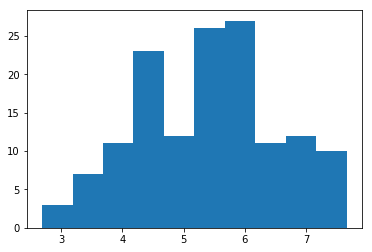

Log GDP per capita
8       7.461401
18      9.337774
24      9.541166
40      9.824955
          ...   
1527    8.692030
1537    7.751505
1548    8.201650
1560    7.538829
Name: Log GDP per capita, Length: 142, dtype: float64


/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


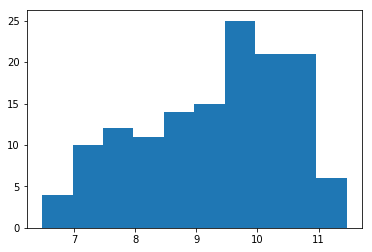

Social support
8       0.559072
18      0.638411
24      0.748588
40      0.882819
          ...   
1527    0.876324
1537    0.775407
1548    0.767047
1560    0.768425
Name: Social support, Length: 142, dtype: float64


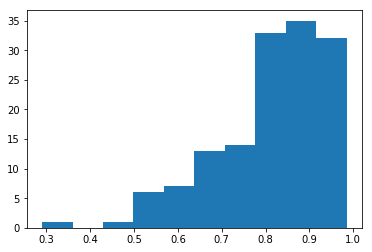

Healthy life expectancy at birth
8       52.016529
18      68.871811
24      65.509514
40      67.398514
          ...    
1527    66.075638
1537    54.796665
1548    53.267151
1560    51.800068
Name: Healthy life expectancy at birth, Length: 142, dtype: float64


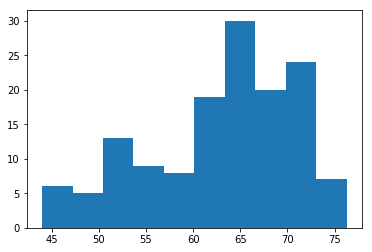

Freedom to make life choices
8       0.522566
18      0.729819
24           NaN
40      0.847702
          ...   
1527    0.894351
1537    0.532964
1548    0.811575
1560    0.732971
Name: Freedom to make life choices, Length: 142, dtype: float64


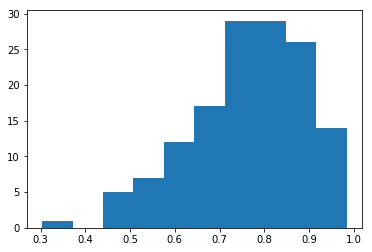

Generosity
8       0.057072
18     -0.023276
24           NaN
40     -0.191952
          ...   
1527   -0.090152
1537   -0.157162
1548    0.112273
1560   -0.065283
Name: Generosity, Length: 142, dtype: float64


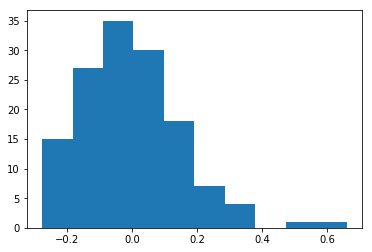

Perceptions of corruption
8       0.793246
18      0.901071
24           NaN
40      0.850924
          ...   
1527    0.799240
1537         NaN
1548    0.770644
1560    0.723612
Name: Perceptions of corruption, Length: 142, dtype: float64


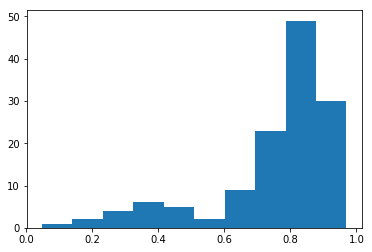

Positive affect
8       0.564953
18      0.675244
24      0.660510
40      0.841907
          ...   
1527    0.536226
1537    0.469345
1548    0.730680
1560    0.737636
Name: Positive affect, Length: 142, dtype: float64


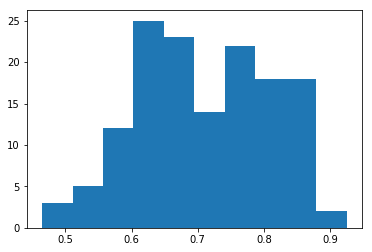

Negative affect
8       0.348332
18      0.321706
24      0.377112
40      0.311646
          ...   
1527    0.222550
1537    0.227925
1548    0.372241
1560    0.208555
Name: Negative affect, Length: 142, dtype: float64


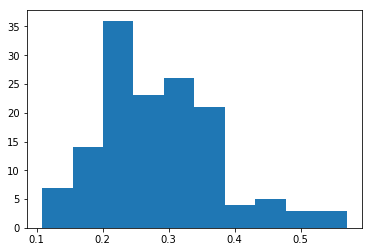

Confidence in national government
8       0.324990
18      0.400910
24           NaN
40      0.419562
          ...   
1527         NaN
1537    0.267581
1548    0.696892
1560    0.699344
Name: Confidence in national government, Length: 142, dtype: float64


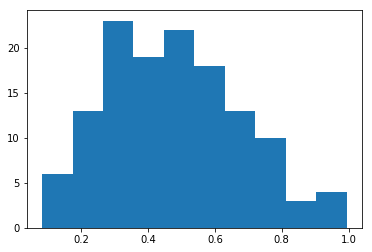

Democratic Quality
8      -1.917693
18      0.208456
24     -1.008262
40      0.381370
          ...   
1527   -0.619272
1537   -2.222766
1548   -0.058471
1560   -0.863044
Name: Democratic Quality, Length: 142, dtype: float64


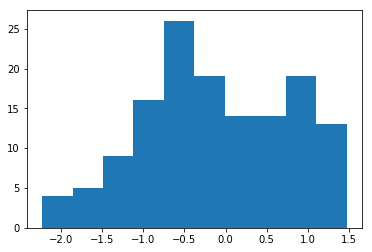

Delivery Quality
8      -1.432548
18     -0.139161
24     -0.814304
40     -0.238002
          ...   
1527   -0.197976
1537   -1.642179
1548   -0.460033
1560   -1.371214
Name: Delivery Quality, Length: 142, dtype: float64


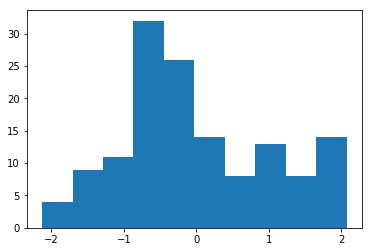

Standard deviation of ladder by country-year
8       1.796219
18      2.646668
24      2.114553
40      2.127109
          ...   
1527    1.767819
1537    2.105525
1548    3.197226
1560    2.776363
Name: Standard deviation of ladder by country-year, Length: 142, dtype: float64


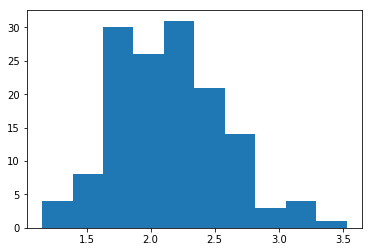

Standard deviation/Mean of ladder by country-year
8       0.425627
18      0.586701
24      0.395920
40      0.330953
          ...   
1527    0.349215
1537    0.550373
1548    0.735410
1560    0.743257
Name: Standard deviation/Mean of ladder by country-year, Length: 142, dtype: float64


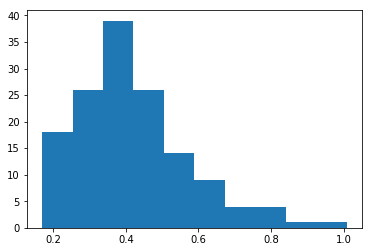

In [35]:
# exclude first 2 columns, select all rows
for i in whr16.iloc[:, 2:16]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(whr16[i])
    # plot a distogram
    plt.hist(whr16[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
 

In [50]:
whr16.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
18,Albania,2016,4.511101,9.337774,0.638411,68.871811,0.729819,-0.023276,0.901071,0.675244,0.321706,0.400910,0.208456,-0.139161,2.646668,0.586701,NaN,0.303250,0.416540
24,Algeria,2016,5.340854,9.541166,0.748588,65.509514,NaN,NaN,NaN,0.660510,0.377112,NaN,-1.008262,-0.814304,2.114553,0.395920,NaN,0.276000,0.604617
40,Argentina,2016,6.427221,9.824955,0.882819,67.398514,0.847702,-0.191952,0.850924,0.841907,0.311646,0.419562,0.381370,-0.238002,2.127109,0.330953,NaN,0.476067,0.332071
52,Armenia,2016,4.325472,9.010698,0.709218,64.962730,0.610987,-0.158839,0.921421,0.593600,0.437228,0.184713,-0.609075,-0.143278,2.126364,0.491591,NaN,0.325067,0.381564


# Life Ladder 

In [67]:
## WHR report data 2016
whr16.sort_values(by='Life Ladder', ascending=False).head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
453,Finland,2016,7.659843,10.584640,0.953940,71.517372,0.948372,-0.036679,0.249660,0.797325,0.181998,0.485727,1.223631,1.991702,1.479019,0.193087,NaN,0.275909,0.394821
1041,Norway,2016,7.596332,11.069432,0.959743,71.086586,0.954352,0.106471,0.409666,0.849626,0.209262,0.657646,1.374090,1.950178,1.579265,0.207898,NaN,0.271727,0.349659
374,Denmark,2016,7.557783,10.735663,0.954452,71.312500,0.948231,0.127812,0.209893,0.836116,0.207583,0.467661,1.161069,1.900531,1.611470,0.213220,NaN,0.267091,0.504989
984,Netherlands,2016,7.540877,10.764322,0.925944,71.619995,0.907310,0.226168,0.433304,0.838432,0.214851,0.572273,1.184741,1.915634,1.281472,0.169937,NaN,0.286909,0.417054
587,Iceland,2016,7.510035,10.720542,0.984940,72.755981,0.951610,0.272110,0.719300,0.873888,0.158169,0.363518,1.338109,1.545734,1.571246,0.209220,NaN,0.280091,0.340639


In [68]:
# Kaggle dataset 2016
df.sort_values(by='Happiness Score', ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [64]:
whr16.sort_values(by='Life Ladder', ascending=False).tail()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
549,Haiti,2016,3.352300,7.410929,0.583742,53.097378,0.303540,0.294325,0.838523,0.552774,0.367341,0.146065,-0.702021,-1.410874,2.188144,0.652729,NaN,0.409000,0.613710
1172,Rwanda,2016,3.332990,7.480852,0.665131,56.800968,0.910736,0.029825,0.158601,0.752311,0.285384,0.993604,-0.632574,0.244016,1.895575,0.568731,NaN,0.505500,0.602567
1370,Tanzania,2016,2.902734,7.856815,0.637756,55.996452,0.775485,0.170367,0.739247,0.693552,0.245986,0.899561,-0.293202,-0.470677,2.513808,0.866014,NaN,0.384667,0.607148
1280,South Sudan,2016,2.888112,7.461286,0.532152,49.578487,0.439919,0.017067,0.785318,0.614771,0.549257,0.456288,-2.044661,-1.846153,2.909562,1.007427,NaN,0.463000,0.740203
251,Central African Republic,2016,2.693061,6.473706,0.290184,43.981968,0.624057,0.058877,0.859073,0.578654,0.494268,0.748755,-1.433271,-1.578398,2.250887,0.835810,NaN,0.499000,0.660534


In [57]:
print(f"The minimum value of Life Ladder is {whr['Life Ladder'].min():.3f} while the maximum is {whr['Life Ladder'].max():.3f}")

The minimum value of Life Ladder is 2.662 while the maximum is 8.019


In [58]:
print(f"The minimum value of Life Ladder in 2016 is {whr16['Life Ladder'].min():.3f} while the maximum is {whr16['Life Ladder'].max():.3f}")

The minimum value of Life Ladder in 2016 is 2.693 while the maximum is 7.660


# Happiness Score in kaggle data

In [65]:
df.sort_values(by='Happiness Score', ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [66]:
df.sort_values(by='Happiness Score', ascending=False).tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


***

# The Happy Planet data

There is xlsx file. The data is in the 'Complete HPI data' sheet. The data starts from the 6th row. There are footers at the end of the sheet.

In [36]:
!ls data


Chapter2OnlineData.xls                  hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness
WHR2018Chapter2OnlineData.xls


In [37]:
hpi = pd.read_excel('data/hpi-data-2016.xlsx', sheet_name='Complete HPI data', header=5, nrows=140)

In [38]:
hpi.head()

,Unnamed: 0,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,NaN,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,NaN,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,NaN,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,NaN,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,NaN,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [39]:
hpi.tail()

,Unnamed: 0,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
135,NaN,29,Venezuela,Americas,73.885,7.1,41.494509,3.57,0.189280,65.453733,6.497572,33.569960,12771.595036,29854238,Data unavailable
136,NaN,5,Vietnam,Asia Pacific,75.477,5.5,32.770246,1.65,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200,38.7
137,NaN,94,Yemen,Middle East and North Africa,63.340,4.1,15.204282,1.03,0.387313,44.721219,3.557846,22.754269,1289.034078,24882792,Data unavailable
138,NaN,77,Zambia,Sub Saharan Africa,58.409,5.0,16.674248,0.99,0.408122,38.674163,4.469524,25.224246,1686.618024,14786581,Data unavailable
139,NaN,99,Zimbabwe,Sub Saharan Africa,53.673,5.0,16.428627,1.37,0.366085,36.914005,4.608568,22.112535,850.827694,14565482,Data unavailable


In [40]:
hpi.index

RangeIndex(start=0, stop=140, step=1)

In [41]:
hpi.columns

Index(['Unnamed: 0', 'HPI Rank', 'Country', 'Region',
       'Average Life \nExpectancy', 'Average Wellbeing\n(0-10)',
       'Happy Life Years', 'Footprint\n(gha/capita)', 'Inequality of Outcomes',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', 'GDP/capita\n($PPP)', 'Population', 'GINI index'],
      dtype='object')

In [42]:
hpi.isna().sum()

Unnamed: 0            140
HPI Rank                0
Country                 0
Region                  0
                     ... 
Happy Planet Index      0
GDP/capita\n($PPP)      0
Population              0
GINI index              0
Length: 15, dtype: int64

In [43]:
hpi.describe()

,Unnamed: 0,HPI Rank,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population
count,0.0,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,NaN,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,NaN,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,NaN,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,NaN,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,NaN,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,NaN,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,NaN,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


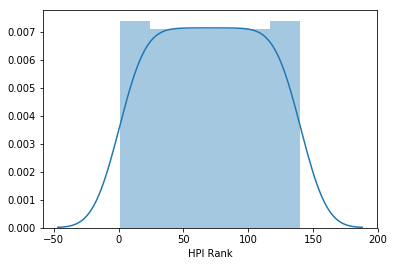

In [44]:
sns.distplot(hpi['HPI Rank'])

Average Life 
Expectancy
0      59.668
1      77.347
2      74.313
3      75.927
        ...  
136    75.477
137    63.340
138    58.409
139    53.673
Name: Average Life \nExpectancy, Length: 140, dtype: float64


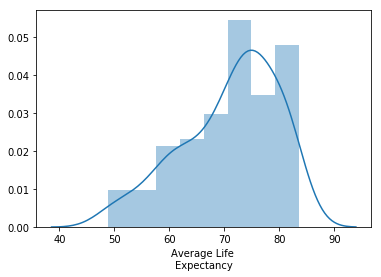

Average Wellbeing
(0-10)
0      3.8
1      5.5
2      5.6
3      6.5
      ... 
136    5.5
137    4.1
138    5.0
139    5.0
Name: Average Wellbeing\n(0-10), Length: 140, dtype: float64


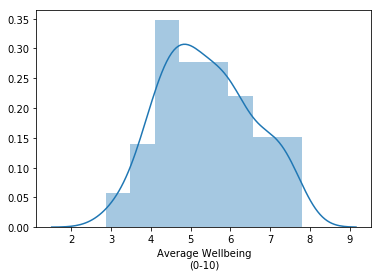

Happy Life Years
0      12.396024
1      34.414736
2      30.469461
3      40.166674
         ...    
136    32.770246
137    15.204282
138    16.674248
139    16.428627
Name: Happy Life Years, Length: 140, dtype: float64


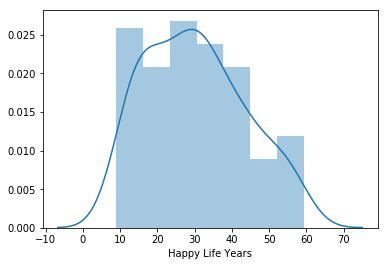

Footprint
(gha/capita)
0      0.79
1      2.21
2      2.12
3      3.14
       ... 
136    1.65
137    1.03
138    0.99
139    1.37
Name: Footprint\n(gha/capita), Length: 140, dtype: float64


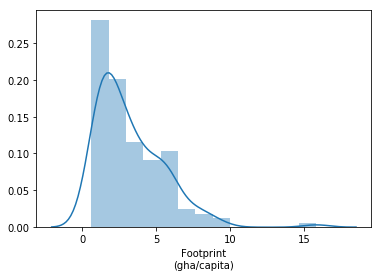

Inequality of Outcomes
0      0.426557
1      0.165134
2      0.244862
3      0.164238
         ...   
136    0.185921
137    0.387313
138    0.408122
139    0.366085
Name: Inequality of Outcomes, Length: 140, dtype: float64


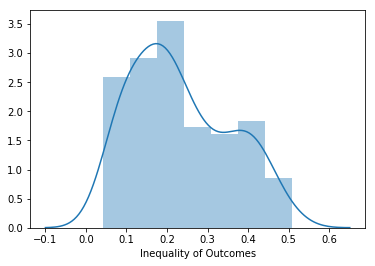

Inequality-adjusted Life Expectancy
0      38.348818
1      69.671159
2      60.474545
3      68.349583
         ...    
136    64.794265
137    44.721219
138    38.674163
139    36.914005
Name: Inequality-adjusted Life Expectancy, Length: 140, dtype: float64


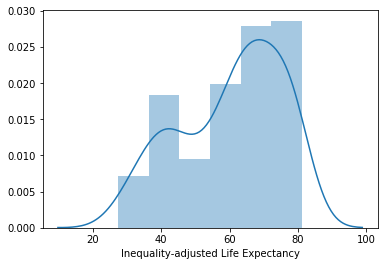

Inequality-adjusted Wellbeing
0      3.390494
1      5.097650
2      5.196449
3      6.034707
         ...   
136    5.215639
137    3.557846
138    4.469524
139    4.608568
Name: Inequality-adjusted Wellbeing, Length: 140, dtype: float64


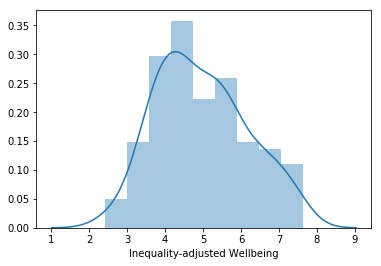

Happy Planet Index
0      20.225350
1      36.766874
2      33.300543
3      35.190244
         ...    
136    40.307589
137    22.754269
138    25.224246
139    22.112535
Name: Happy Planet Index, Length: 140, dtype: float64


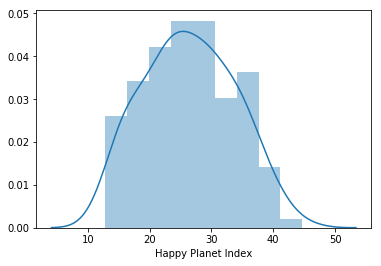

GDP/capita
($PPP)
0        690.842629
1       4247.485437
2       5583.616160
3      14357.411589
           ...     
136     1754.547974
137     1289.034078
138     1686.618024
139      850.827694
Name: GDP/capita\n($PPP), Length: 140, dtype: float64


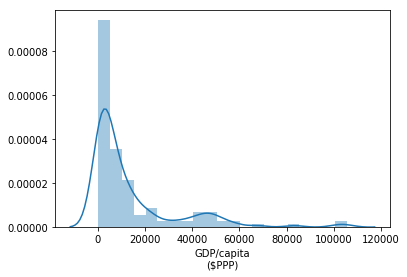

In [45]:
# exclude first 2 columns, select all rows
for i in hpi.iloc[:, 4:13]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(hpi[i])
    # plot a distogram
    sns.distplot(hpi[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
 